In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [22]:
# USER INPUTS
A = 66.7838524360216 #lbf
B = 0.450065235440471 #lbf/mph
C = 0.0475958369438377 #lbf/mph^2
Mass = 9350 #lb

# Do not recommend changing this:
Initial_Speed = 78; #mph
Time = 0; 
velocity_list = [Initial_Speed]
time_vector = [Time]

In [23]:
# Applying Newton's Second Law to convert the Force(lbf) x Velocity(mph) plot (given by the ABCs) to Acceleration(ft/s^2) x Velocity(mph) plot.
# This function will iterate once for each mission second. The initial speed is not a fixed value, there's a new one being calculated every second.
def decel_iteration(Initial_Speed,A,B,C):
    newA = A/Mass; # F = M*A ---> F/M = A  
    newB = B/Mass;
    newC = C/Mass; # newABCs are correlated to the acceleration plot, not dissipative forces plot.
    decel_value = newC*Initial_Speed**2 + newB*Initial_Speed + newA #calculating the acceleration(ft/s^2) correlated to the given speed(mph)
    new_Speed = Initial_Speed - (decel_value*32.174*0.681818) #converting the acceleration from (ft/s^2) to (mph/s) and then subtracting it from the initial speed.
    return(new_Speed)

In [24]:
Time = Time + 1 # First iteration. 
new_Speed = decel_iteration(Initial_Speed,A,B,C) #Calling the deceleration function.
velocity_list.append(new_Speed) #Saving results into a list.
time_vector.append(Time)
while new_Speed>=0: # Iterating until the vehicle stops.
    Time = Time + 1
    new_Speed = decel_iteration(new_Speed,A,B,C)
    velocity_list.append(new_Speed)
    time_vector.append(Time)

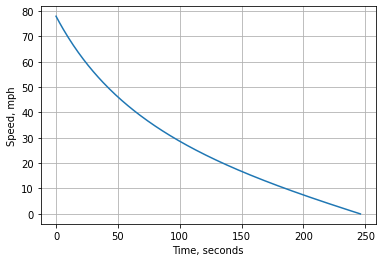

In [27]:
plt.plot(time_vector,velocity_list);plt.xlabel('Time, seconds');plt.ylabel('Speed, mph');plt.grid(1)

In [30]:
coastdown_profile = pd.DataFrame(list(zip(time_vector, velocity_list)), columns =['Time(sec)', 'Speed(mph)'])
coastdown_profile

,Time(sec),Speed(mph)
0,0,78.000000
1,1,77.081558
2,2,76.179992
3,3,75.294807
4,4,74.425530
...,...,...
242,242,0.538164
243,243,0.380877
244,244,0.223771
245,245,0.066842


In [29]:
#exporting mission profile to excel file
cwd = os.getcwd()
file_path = cwd + '/mss_profile.xlsx'
coastdown_profile.to_excel(file_path, index = False)
file_path

'c:\\SIM\\CoastdownReversal/mss_profile.xlsx'